#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import requests
import json

df = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
dados = json.loads(df.text)
dados = pd.json_normalize(dados, sep='_')
dados.head(len(dados))

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

In [2]:
for col in dados.columns:
  print(f"Valores únicos da coluna'{col}': {dados[col].nunique()}")
  if dados[col].nunique() > 50:
    print('-' * 50)
  else:
    print(dados[col].unique())
    print('-' * 50)

Valores únicos da coluna'customerID': 7267
--------------------------------------------------
Valores únicos da coluna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
Valores únicos da coluna'customer_gender': 2
['Female' 'Male']
--------------------------------------------------
Valores únicos da coluna'customer_SeniorCitizen': 2
[0 1]
--------------------------------------------------
Valores únicos da coluna'customer_Partner': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos da coluna'customer_Dependents': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos da coluna'customer_tenure': 73
--------------------------------------------------
Valores únicos da coluna'phone_PhoneService': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos da coluna'phone_MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores únicos da

In [3]:
dados_tratados = dados
dados_tratados.replace(["", " ", "."], np.nan, inplace=True)
dados_tratados.isnull().sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [4]:
print(dados_tratados['customerID'].duplicated().any())

False


In [5]:
dados_tratados.replace([np.nan], 0, inplace=True)
remover_dados = dados_tratados.query('Churn == 0').index

In [6]:
dados_tratados.drop(remover_dados, axis=0, inplace=True)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

In [8]:
dados_tratados['account_Charges_Total'] = dados_tratados['account_Charges_Total'].astype(np.float64)
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

In [9]:
dados_tratados['custoDiario'] = (dados_tratados['account_Charges_Monthly'] / 30).round(2)
dados_tratados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,custoDiario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [10]:
for col in ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']:
  dados_tratados[col] = dados_tratados[col].apply(lambda x: 1 if x == 'Yes' else 0)

dados_tratados.rename(columns={'customerID': 'clienteID', 'Churn': 'perdaCliente', 'customer_gender': 'genero', 'customer_SeniorCitizen': 'pessoaIdosa', 'customer_Partner': 'conjuge',
                               'customer_Dependents': 'dependentes', 'customer_tenure': 'duracaoContrato', 'phone_PhoneService': 'servicoTelefone', 'phone_MultipleLines': 'multiplasLinhas',
                               'internet_InternetService': 'servicoInternet', 'internet_OnlineSecurity': 'protecaoOnline', 'internet_OnlineBackup': 'backupOnline', 'internet_DeviceProtection': 'protecaoDispositivo',
                               'internet_TechSupport': 'suporteTecnico', 'internet_StreamingTV': 'servicoTV', 'internet_StreamingMovies': 'servicoFilmes', 'account_Contract': 'tipoContrato',
                               'account_PaperlessBilling': 'faturaOnline', 'account_PaymentMethod': 'metodoPagamento', 'account_Charges_Monthly': 'custoMensal', 'account_Charges_Total': 'custoTotal'}, inplace=True)
dados_tratados.head()

,clienteID,perdaCliente,genero,pessoaIdosa,conjuge,dependentes,duracaoContrato,servicoTelefone,multiplasLinhas,servicoInternet,...,protecaoDispositivo,suporteTecnico,servicoTV,servicoFilmes,tipoContrato,faturaOnline,metodoPagamento,custoMensal,custoTotal,custoDiario
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [11]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clienteID            7043 non-null   object 
 1   perdaCliente         7043 non-null   int64  
 2   genero               7043 non-null   object 
 3   pessoaIdosa          7043 non-null   int64  
 4   conjuge              7043 non-null   int64  
 5   dependentes          7043 non-null   int64  
 6   duracaoContrato      7043 non-null   int64  
 7   servicoTelefone      7043 non-null   int64  
 8   multiplasLinhas      7043 non-null   object 
 9   servicoInternet      7043 non-null   object 
 10  protecaoOnline       7043 non-null   object 
 11  backupOnline         7043 non-null   object 
 12  protecaoDispositivo  7043 non-null   object 
 13  suporteTecnico       7043 non-null   object 
 14  servicoTV            7043 non-null   object 
 15  servicoFilmes        7043 non-null   object

#📊 Carga e análise

In [12]:
dados_tratados.describe()

,perdaCliente,pessoaIdosa,conjuge,dependentes,duracaoContrato,servicoTelefone,faturaOnline,custoMensal,custoTotal,custoDiario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


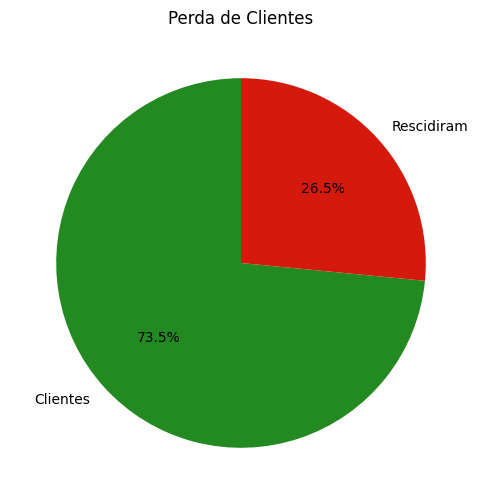

In [13]:
contagemPerda = dados_tratados['perdaCliente'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
contagemPerda.plot.pie(autopct='%1.1f%%', colors=['#238A22','#D41A0C'], labels=['Clientes', 'Rescidiram'], startangle=90)
plt.title('Perda de Clientes')
plt.ylabel('')
plt.show()

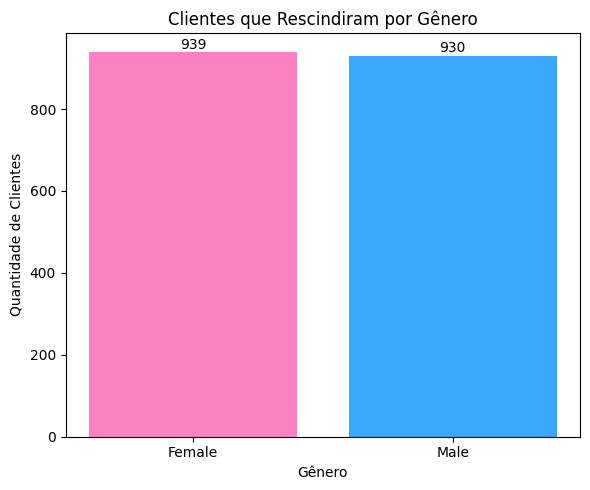

In [14]:
rescindiram = dados_tratados[dados_tratados['perdaCliente'] == 1]

contagem_genero = rescindiram['genero'].value_counts()

plt.figure(figsize=(6,5))
bars = plt.bar(contagem_genero.index, contagem_genero.values, color=['#FC81C0', '#39A8FA'])

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 1,
             str(altura), ha='center', va='bottom', fontsize=10)

plt.title('Clientes que Rescindiram por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Clientes')
plt.tight_layout()
plt.show()


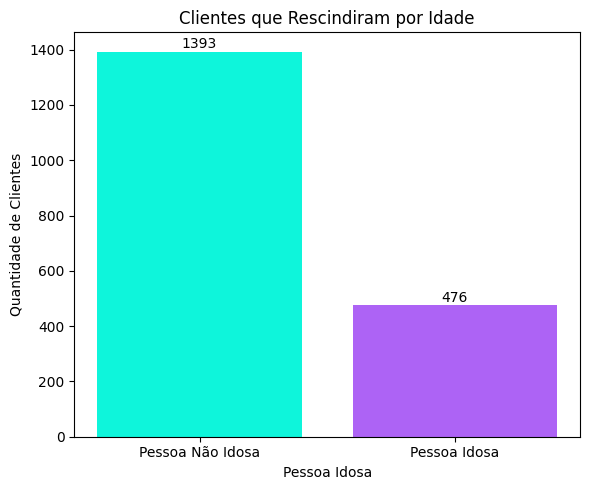

In [15]:
contagem_idoso = rescindiram['pessoaIdosa'].value_counts()

plt.figure(figsize=(6,5))
bars = plt.bar(contagem_idoso.index, contagem_idoso.values, color=['#0EF5DB', '#AD63F5'])

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 1,
             str(altura), ha='center', va='bottom', fontsize=10)

plt.xticks([0, 1], ['Pessoa Não Idosa', 'Pessoa Idosa'])

plt.title('Clientes que Rescindiram por Idade')
plt.xlabel('Pessoa Idosa')
plt.ylabel('Quantidade de Clientes')
plt.tight_layout()
plt.show()

In [16]:
import plotly.express as px
import pandas as pd

pd.options.mode.copy_on_write = True
rescindiram['contagem'] = 1
grafico = rescindiram.groupby(['metodoPagamento', 'tipoContrato'], as_index=False)['contagem'].count()

fig = px.bar(
    grafico,
    x='metodoPagamento',
    y='contagem',
    color='tipoContrato',
    text='contagem',
    barmode='group',
    labels={
        'metodoPagamento': 'Método de Pagamento',
        'contagem': 'Número de Clientes',
        'tipoContrato': 'Tipo de Contrato'
    }
)

fig.update_layout(
        title='Tipo de Contrato por Método de Pagamento',
        title_x=0.5,
)

fig.update_traces(textposition='outside')
fig.show()

In [17]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df = rescindiram.copy()

def faixa_contrato(meses):
    if meses <= 12:
        return '<= 12 meses'
    elif 12 < meses <= 24:
        return '13-24 meses'
    else:
        return '>= 25 meses'

df['faixaContrato'] = df['duracaoContrato'].apply(faixa_contrato)

df_linhas = df.groupby(['faixaContrato', 'duracaoContrato']).size().reset_index(name='Quantidade')
df_linhas.sort_values(by='duracaoContrato', inplace=True)

df_barras = df['faixaContrato'].value_counts().reset_index()
df_barras.columns = ['Faixa de Contrato', 'Quantidade']

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Rescisões por Mês", "Total por Faixa de Duração"),
    vertical_spacing=0.09
)

cores = {'<= 12 meses': 'red', '13-24 meses': 'green', '>= 25 meses': 'blue'}

for faixa in df_linhas['faixaContrato'].unique():
    faixa_df = df_linhas[df_linhas['faixaContrato'] == faixa]
    fig.add_trace(
        go.Scatter(
            x=faixa_df['duracaoContrato'],
            y=faixa_df['Quantidade'],
            mode='lines+markers',
            name=faixa,
            line=dict(color=cores[faixa])
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=faixa_df['duracaoContrato'],
            y=faixa_df['Quantidade'],
            mode='text',
            text=faixa_df['Quantidade'],
            textposition='top center',
            showlegend=False
        ),
        row=1, col=1
    )

ordem_personalizada = ['<= 12 meses', '13-24 meses', '>= 25 meses']
df_barras['Faixa de Contrato'] = pd.Categorical(df_barras['Faixa de Contrato'], categories=ordem_personalizada, ordered=True)
df_barras.sort_values('Faixa de Contrato', inplace=True)

fig.add_trace(
    go.Bar(
        x=df_barras['Faixa de Contrato'],
        y=df_barras['Quantidade'],
        text=df_barras['Quantidade'],
        textposition='outside',
        marker_color=[cores[faixa] for faixa in df_barras['Faixa de Contrato']],
        name='Total por Faixa',
        showlegend=False
    ),
    row=2, col=1
)

fig.update_layout(
    title_text="Comparativo de Rescisões por Duração de Contrato",
    title_x=0.5,
    showlegend=True,
    height=1200,
    legend_title_text="Faixa de Duração"
)

fig.show()

In [18]:
import plotly.express as px

df = rescindiram.copy()

fig = px.box(
    df,
    y='custoMensal',
    points='all',
    color_discrete_sequence=['darkcyan'],
    title='Distribuição de Custo Mensal nas Rescisões'
)

fig.update_layout(
    yaxis_title='Custo Mensal',
    title_x=0.5,
    height=600
)

fig.show()

#**📄Relatorio Final**

#📌**Introdução**
---
A empresa de telecomunicações TelecomX enfrenta atualmente um elevado índice de evasão de clientes (churn), o que representa um impacto significativo sobre sua receita e previsibilidade de negócios. Para reverter esse cenário, torna-se essencial compreender os principais fatores que influenciam as rescisões contratuais e, a partir dessa análise, direcionar estratégias assertivas de retenção e melhoria dos serviços oferecidos.<p><br>

###🧹**Limpeza e Tratamento de Dados**
---
Inicialmente, foi realizado o carregamento do arquivo .json contendo as informações dos clientes, seguido da normalização dos dados para viabilizar a manipulação adequada do dataframe. Em seguida, as seguintes etapas foram executadas:
- <u>Validação da Distribuição dos Dados:</u> Foram analisados os valores únicos de cada coluna para entender a diversidade das informações presentes.
- <u>Tratamento de Dados Ausentes:</u> Identificado 224 registros sem indicação do status de evasão do cliente. Esses dados foram excluídos para garantir a integridade das análises subsequentes.
- <u>Verificação de Duplicidade:</u> A base foi avaliada quanto à existência de clientes duplicados, assegurando que cada registro representasse uma instância única.
- <u>Ajuste de Tipagem:</u> A coluna referente ao valor total foi convertida para o tipo float, permitindo o correto processamento e análise de valores numéricos.
- <u>Padronização de Nomenclatura:</u> As colunas foram renomeadas para o idioma português, com o objetivo de facilitar a compreensão dos dados durante o desenvolvimento das análises.<p><br>

###🧭**Principais Comportamentos Observados na Análise de Evasão**
---
Com base nas análises realizadas, foi identificado os seguintes padrões relevantes:<br>
- A taxa de evasão é de **26,5%**;
- A distribuição entre os gêneros está equilibrada, contudo, **74,53% das pessoas que rescindiram o contrato não são idosas**;
- O tipo de contrato com maior incidência de cancelamento é o **Month-to-Month**;
- O método de pagamento com a maior faixa de recisão é o **Electronic Check**;
- A maior taxa de cancelamentos ocorre **no primeiro mês de contrato**;
- Todos os contratos rescindidos no primeiro mês são do tipo **Month-to-Month**;
- A variação de cancelamentos é mais acentuada **nos 12 primeiros meses de contrato**;
- A maior concentração de cancelamento está **na faixa dos planos com valores entre R\$ 56,15 e R\$ 79,65**, os quais incluem serviço de internet, sendo a maioria **DSL como serviço de internet**.<p><br>

###🎯**Recomendações**
---
Com base nos dados analisados, seguimos com as seguintes recomendações:<br><br>

**1. Intervenção nos primeiros meses**
- Implementar ações de onboarding mais eficazes, como tutoriais e canais de suporte ativo no 1º mês;
- Enviar mensagens de acompanhamento personalizadas nos primeiros 30 dias, oferecendo ajuda e benefícios.<br><br>

**2. Reestruturação do contrato Month-to-Month**
- Validar se há alguma falha na recorrência desse tipo de contrato;
- Oferecer incentivos para contratos com maior fidelidade (como trimestrais ou anuais com descontos);
- Reforçar os benefícios de longo prazo em campanhas educativas.<br><br>

**3. Gestão de preços e percepção de valor**
-	Revisar os planos que custam entre R\$56,15 e R\$79,65, avaliando se estão entregando valor compatível;
-	Incluir valor agregado nos pacotes dessa faixa, como serviços adicionais ou velocidade maior de internet.<br><br>

**4. Métodos de pagamento com alta evasão**
-	Verificar se o método Electronic Check está relacionado a problemas técnicos ou de usabilidade;
-	Incentivar migração para métodos de pagamento mais estáveis e seguros por meio de campanhas informativas.<br><br>

**5. Revisão da qualidade dos serviços DSL**
-	Avaliar a performance e satisfação dos clientes com internet DSL — já que ela está presente em grande parte dos contratos cancelados;
-	Oferecer upgrade para fibra ou planos alternativos com condições especiais.<br><br>

**6. Feedback imediato após cancelamento**
-	Criar um fluxo automatizado de coleta de feedback ao encerrar o contrato — breve, simples e direto.<br><br>

**7. Campanhas de reengajamento**
-	Desenvolver ações de winback, oferecendo benefícios exclusivos para clientes que rescindiram recentemente.<br><br>

**8. Transparência e clareza no momento da venda**
-	Garantir que as condições do plano, fidelidade e serviços inclusos estejam claramente explicados e de fácil entendimento ao cliente.